Final architecture test

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from interstellar import Tracks, DenseNetworkGrid, set_seed

In [2]:
name = 'grid_10'
save_path = f'/home/ADF/ajl573/Data/interstellar_data/{name}'
load_path = '/home/ADF/ajl573/Data/interstellar_data/tracks_02'

In [3]:
tracks = Tracks()
tracks.load(load_path)

In [4]:
tracks.get_metadata().head()

,file_name,m,Y,FeH,MLT,ov,dif
0,m1.0Y0.24FeH-0.1MLT2.3ov0.0dif1.csv,1.00,0.24,-0.1,2.3,0.0,1
1,m0.92Y0.28FeH-0.3MLT1.7ov0.0dif1.csv,0.92,0.28,-0.3,1.7,0.0,1
2,m0.82Y0.32FeH0.1MLT2.1ov0.0dif1.csv,0.82,0.32,0.1,2.1,0.0,1
3,m0.82Y0.24FeH0.0MLT1.9ov0.0dif1.csv,0.82,0.24,0.0,1.9,0.0,1
4,m1.17Y0.28FeH0.1MLT2.3ov0.0dif1.csv,1.17,0.28,0.1,2.3,0.0,1


In [5]:
tracks.get_data().head()

,evol_stage,initial_feh,star_mass,luminosity,log_g,star_feh,log_frac_age,log_initial_mass,log_initial_MLT,log_initial_Yinit,...,log_initial_MLT_norm,log_initial_Yinit_norm,log_initial_Z_norm,log_star_age_norm,log_effective_T_norm,log_radius_norm,log_delta_nu_fit_norm,star_feh_norm,log_surface_he4_norm,log_surface_Z_norm
0,1,-0.1,1.0,0.760630,4.560423,-0.100188,-2.394550,0.0,0.361728,-0.619789,...,0.082728,-0.066789,-0.074825,-2.172096,0.009556,-0.153267,0.227380,-0.005188,0.002002,-0.011841
1,1,-0.1,1.0,0.749957,4.564024,-0.100198,-2.385753,0.0,0.361728,-0.619789,...,0.082728,-0.066789,-0.074825,-2.163299,0.008922,-0.155067,0.230071,-0.005198,0.001994,-0.011848
2,1,-0.1,1.0,0.741406,4.566707,-0.100209,-2.375426,0.0,0.361728,-0.619789,...,0.082728,-0.066789,-0.074825,-2.152973,0.008348,-0.156409,0.232081,-0.005209,0.001984,-0.011856
3,1,-0.1,1.0,0.735484,4.568303,-0.100221,-2.363350,0.0,0.361728,-0.619789,...,0.082728,-0.066789,-0.074825,-2.140897,0.007876,-0.157207,0.233283,-0.005221,0.001973,-0.011865
4,1,-0.1,1.0,0.732361,4.568802,-0.100238,-2.349288,0.0,0.361728,-0.619789,...,0.082728,-0.066789,-0.074825,-2.126835,0.007539,-0.157456,0.233670,-0.005238,0.001958,-0.011876


In [6]:
x_cols = ['log_frac_age_norm', 'log_initial_mass_norm','log_initial_MLT_norm', 
          'log_initial_Yinit_norm', 'log_initial_Z_norm']
y_cols = ['log_star_age_norm', 'log_effective_T_norm', 'log_radius_norm',
          'log_delta_nu_fit_norm', 'log_surface_he4_norm', 'log_surface_Z_norm']

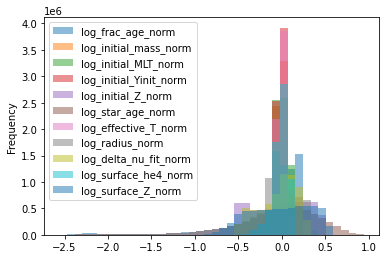

In [7]:
tracks.get_data().plot(kind='hist',
                       y=x_cols+y_cols,
                       bins=40, alpha=0.5)

In [8]:
set_seed(101)
data = tracks.sample_data(fraction=1.0, columns=x_cols+y_cols)
data.head()

,log_frac_age_norm,log_initial_mass_norm,log_initial_MLT_norm,log_initial_Yinit_norm,log_initial_Z_norm,log_star_age_norm,log_effective_T_norm,log_radius_norm,log_delta_nu_fit_norm,log_surface_he4_norm,log_surface_Z_norm
5323617,-0.413108,-0.066581,0.082728,0.000158,-0.098340,-0.120701,-0.005829,-0.186181,0.241946,0.035663,-0.064664
4920966,0.165619,0.083181,-0.000246,0.030121,0.471477,0.150685,-0.074867,0.292421,-0.399550,0.089082,0.526601
2948371,-0.273604,0.064698,-0.102909,-0.032027,0.011987,-0.388764,0.024218,0.018269,0.001753,-0.102742,-0.052748
229413,-0.588613,-0.046610,0.082728,0.030121,-0.110549,-0.448798,0.013448,-0.168372,0.224419,0.077867,-0.066061
1054345,-0.196777,-0.018276,-0.048551,0.030121,0.376348,0.090103,-0.034648,-0.105347,0.148099,0.052552,0.400300


In [9]:
train = data.head(int(0.8*len(data)) + 1)
val = data.tail(int(0.2*len(data)))

In [10]:
print(f'Length of training data = {len(train)}')
print(f'Length of validation data = {len(val)}')

Length of training data = 5163732
Length of validation data = 1290932


In [11]:
n_batches = np.arange(500, 2000)  # Select a range where number of batches is reasonable
r = len(train) % n_batches 

# Print whole multiples of training size
print(f'choose number of batches from:\n{n_batches[r==0]}')

choose number of batches from:
[ 558  651  661  868 1116 1302 1322 1953 1983]


In [12]:
depth = [6, 9, 12]
width = [128]
activation = 'elu'
batch_size = len(train)//868
regularization_l2 = 0.0
optimizer = 'nadam'
loss = 'mae'
metrics = ['mse']

In [13]:
grid = DenseNetworkGrid(path=save_path, name=name, depth=depth, width=width,
                        activation=activation, batch_size=batch_size, regularization_l2=regularization_l2)

grid.data

,depth,width,activation,batch_size,regularization_l2
name,,,,,
grid_10_0,6,128,elu,5949,0.0
grid_10_1,9,128,elu,5949,0.0
grid_10_2,12,128,elu,5949,0.0


In [14]:
grid.make_networks()

In [15]:
grid.build_all(len(x_cols), len(y_cols))

In [16]:
grid.compile_all(optimizer=optimizer, loss=loss, metrics=metrics)

In [17]:
data = None

In [18]:
grid.train_all(train, x_cols, y_cols, epochs=50, validation_data=val, validation_split=None,
               callbacks=['checkpoint', 'tensorboard'], history_kw={'nth_row': 5})

Add a function which plots history for all networks.

Text(0, 0.5, 'loss (mae)')

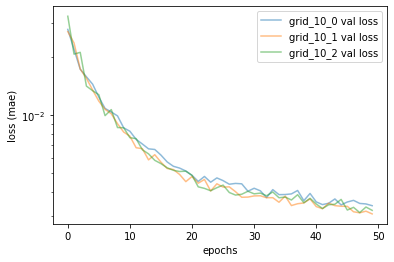

In [19]:
fig, ax = plt.subplots()
for network in grid.networks:
    network.history.plot(ax=ax, x='epochs', y=['val_loss'], logy=True, alpha=0.5,
                         label=[f'{network.name} val loss'])
ax.set_ylabel('loss (mae)')

In [20]:
grid.evaluate_all(val.sample(n=5000))

,mae,mse
name,,
grid_10_0,0.003415,0.000031
grid_10_1,0.003098,0.000026
grid_10_2,0.003209,0.000027


In [21]:
grid.data

,depth,width,activation,batch_size,regularization_l2,model_filename,history_filename
name,,,,,,,
grid_10_0,6,128,elu,5949,0.0,grid_10_0_model.h5,grid_10_0_history.csv
grid_10_1,9,128,elu,5949,0.0,grid_10_1_model.h5,grid_10_1_history.csv
grid_10_2,12,128,elu,5949,0.0,grid_10_2_model.h5,grid_10_2_history.csv


In [22]:
import seaborn as sns

In [23]:
val = val.sample(n=10000)

In [24]:
df_dict = {}
for i, network in enumerate(grid.networks):
#     network = grid.networks[i]
    df_dict[network.name] = np.abs(network.predict(val) - val[y_cols].reset_index(drop=True))

In [25]:
df_err = pd.concat(df_dict).reset_index(level=0).rename(columns={'level_0': 'name'})
df_err.head()

,name,log_star_age_norm,log_effective_T_norm,log_radius_norm,log_delta_nu_fit_norm,log_surface_he4_norm,log_surface_Z_norm
0,grid_10_0,0.008725,0.000168,0.001010,0.000516,0.000206,0.004824
1,grid_10_0,0.001849,0.004210,0.007078,0.012235,0.002582,0.000695
2,grid_10_0,0.006461,0.000012,0.003251,0.005480,0.000425,0.002870
3,grid_10_0,0.003495,0.001397,0.001637,0.003484,0.003777,0.003359
4,grid_10_0,0.001952,0.001124,0.001210,0.002908,0.001879,0.000008


In [26]:
df_mae = pd.concat(df_dict).mean(axis=1).reset_index(level=0).rename(columns={'level_0': 'name', 0: 'mae'})
df_mae.head()

,name,mae
0,grid_10_0,0.002575
1,grid_10_0,0.004775
2,grid_10_0,0.003083
3,grid_10_0,0.002858
4,grid_10_0,0.001514


In [27]:
df_mae['log_mae'] = np.log10(df_mae['mae'])

In [28]:
order = df_mae.set_index('name').median(level=0).sort_values('log_mae', ascending=False).index

In [29]:
df_err.head()

,name,log_star_age_norm,log_effective_T_norm,log_radius_norm,log_delta_nu_fit_norm,log_surface_he4_norm,log_surface_Z_norm
0,grid_10_0,0.008725,0.000168,0.001010,0.000516,0.000206,0.004824
1,grid_10_0,0.001849,0.004210,0.007078,0.012235,0.002582,0.000695
2,grid_10_0,0.006461,0.000012,0.003251,0.005480,0.000425,0.002870
3,grid_10_0,0.003495,0.001397,0.001637,0.003484,0.003777,0.003359
4,grid_10_0,0.001952,0.001124,0.001210,0.002908,0.001879,0.000008


In [30]:
df_err_col = df_err.set_index('name').stack().reset_index().rename(columns={'level_1': 'output',
                                                                0: 'abs_err'})

df_err_col['log_abs_err'] = np.log10(df_err_col['abs_err'])

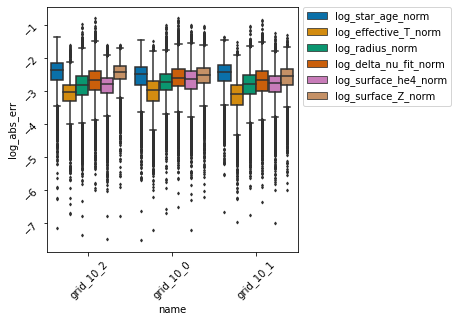

In [31]:
w = 1.5 * len(grid.data)
fig, ax = plt.subplots(figsize=(w, 4.5))
width = 0.15 * len(y_cols)
sns.boxplot(data=df_err_col, x='name', y='log_abs_err', hue='output',
            width=width, fliersize=2, color='C0', palette='colorblind',
            order=order, ax=ax, saturation=0.9)
# ax.set_yscale('log')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
ax.legend(bbox_to_anchor=(1.0, 1.02))

In [32]:
scores = grid.score_all(val)

In [33]:
scores.xs('std', level=1)

,log_star_age_norm,log_effective_T_norm,log_radius_norm,log_delta_nu_fit_norm,log_surface_he4_norm,log_surface_Z_norm
grid_10_0,0.003650,0.001908,0.004717,0.007285,0.004241,0.004005
grid_10_1,0.003919,0.001505,0.004294,0.006648,0.002470,0.002772
grid_10_2,0.004449,0.001220,0.004316,0.006521,0.002127,0.002786


Comparison between TF on the GPU and Theano using the CPU. I think we should start using TF on GPU for probability where possible --> looking forward to PyMC4!

In [37]:
val_small = val.sample(100)

In [45]:
%timeit grid.networks['grid_10_0'].model.predict(val_small[x_cols])

20 ms ± 385 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [46]:
%timeit grid.networks['grid_10_1'].model.predict(val_small[x_cols])

20.2 ms ± 437 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [47]:
%timeit grid.networks['grid_10_2'].model.predict(val_small[x_cols])

21.9 ms ± 1.05 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [52]:
t = [net.to_theano() for net in grid.networks]

In [58]:
%timeit t[0](val_small[x_cols].to_numpy()).eval()

68.1 ms ± 960 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [59]:
%timeit t[1](val_small[x_cols].to_numpy()).eval()

97.1 ms ± 1.03 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [60]:
%timeit t[2](val_small[x_cols].to_numpy()).eval()

128 ms ± 1.92 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [63]:
diff = grid.networks['grid_10_0'].model.predict(val_small[x_cols]) - t[0](val_small[x_cols].to_numpy()).eval()

Float 32-bit precision is ~ 1e-7 so the difference between TF and theano should be around this figure.

(array([492.,  81.,  11.,   4.,   5.,   1.,   3.,   2.,   0.,   1.]),
 array([1.01105978e-10, 6.65186349e-08, 1.32936164e-07, 1.99353693e-07,
        2.65771222e-07, 3.32188751e-07, 3.98606280e-07, 4.65023808e-07,
        5.31441337e-07, 5.97858866e-07, 6.64276395e-07]),
 <a list of 10 Patch objects>)

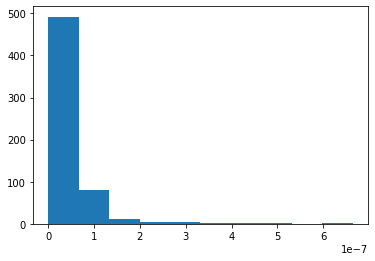

In [71]:
plt.hist(np.abs(diff.flatten()))

Import grid_09 to compare this more.

In [77]:
grid9 = DenseNetworkGrid.from_data('/home/ADF/ajl573/Data/interstellar_data/grid_09/grid_09_data.csv')

In [78]:
grid9.data

,depth,width,activation,batch_size,regularization_l2,model_filename,history_filename
name,,,,,,,
grid_09_0,5,128,elu,5949,0.0,grid_09_0_model.h5,grid_09_0_history.csv
grid_09_1,8,128,elu,5949,0.0,grid_09_1_model.h5,grid_09_1_history.csv
grid_09_2,5,512,elu,5949,0.0,grid_09_2_model.h5,grid_09_2_history.csv
grid_09_3,8,512,elu,5949,0.0,grid_09_3_model.h5,grid_09_3_history.csv


In [85]:
grid9.make_networks()
grid9.load_models()

In [86]:
grid9.networks

name
grid_09_0    <interstellar.networks.DenseNetwork object at ...
grid_09_1    <interstellar.networks.DenseNetwork object at ...
grid_09_2    <interstellar.networks.DenseNetwork object at ...
grid_09_3    <interstellar.networks.DenseNetwork object at ...
dtype: object

In [89]:
%timeit grid9.networks['grid_09_0'].model.predict(val_small[x_cols])

19.9 ms ± 141 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [90]:
%timeit grid9.networks['grid_09_1'].model.predict(val_small[x_cols])

19.9 ms ± 29.8 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [91]:
t9 = [net.to_theano() for net in grid9.networks]

In [92]:
%timeit t9[0](val_small[x_cols].to_numpy()).eval()

57.8 ms ± 95.3 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [93]:
%timeit t9[1](val_small[x_cols].to_numpy()).eval()

86.8 ms ± 399 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [94]:
%timeit t9[0](val_small[x_cols].to_numpy())

9.27 ms ± 92 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [98]:
import theano.tensor as T

xx = T._shared(val_small[x_cols].to_numpy())

In [104]:
%timeit t9[1](xx)

13.4 ms ± 15.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [108]:
times = np.array([58, 68, np.nan, 87, 97, np.nan, np.nan, 128])
d = np.arange(5, 13)

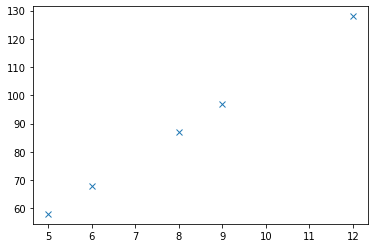

In [110]:
plt.plot(d, times, 'x')
plt.ylabel()